In [2]:
# ---------------------------------------
# Global Disaster Response Visualizations
# ---------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# ---------------------------------------
# Load Dataset
# ---------------------------------------

file_path = "global_disaster_response_2018_2024.csv"
df = pd.read_csv(file_path)

# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])

In [4]:
# ---------------------------------------
# Show Head of Dataset
# ---------------------------------------

print("Dataset Preview:")
print(df.head())

Dataset Preview:
        date        country disaster_type  severity_index  casualties  \
0 2021-01-31         Brazil    Earthquake            5.99         111   
1 2018-12-23         Brazil  Extreme Heat            6.53         100   
2 2020-08-10          India     Hurricane            1.55          22   
3 2022-09-15      Indonesia  Extreme Heat            4.55          94   
4 2022-09-28  United States      Wildfire            3.80          64   

   economic_loss_usd  response_time_hours  aid_amount_usd  \
0         7934365.71                15.62       271603.79   
1         8307648.99                 5.03       265873.81   
2          765136.99                32.54        49356.49   
3         1308251.31                 7.83       237512.88   
4         2655864.36                21.90       188910.69   

   response_efficiency_score  recovery_days  latitude  longitude  
0                      83.21             67   -30.613   -122.557  
1                      96.18             55

/tmp/ipython-input-1847093360.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




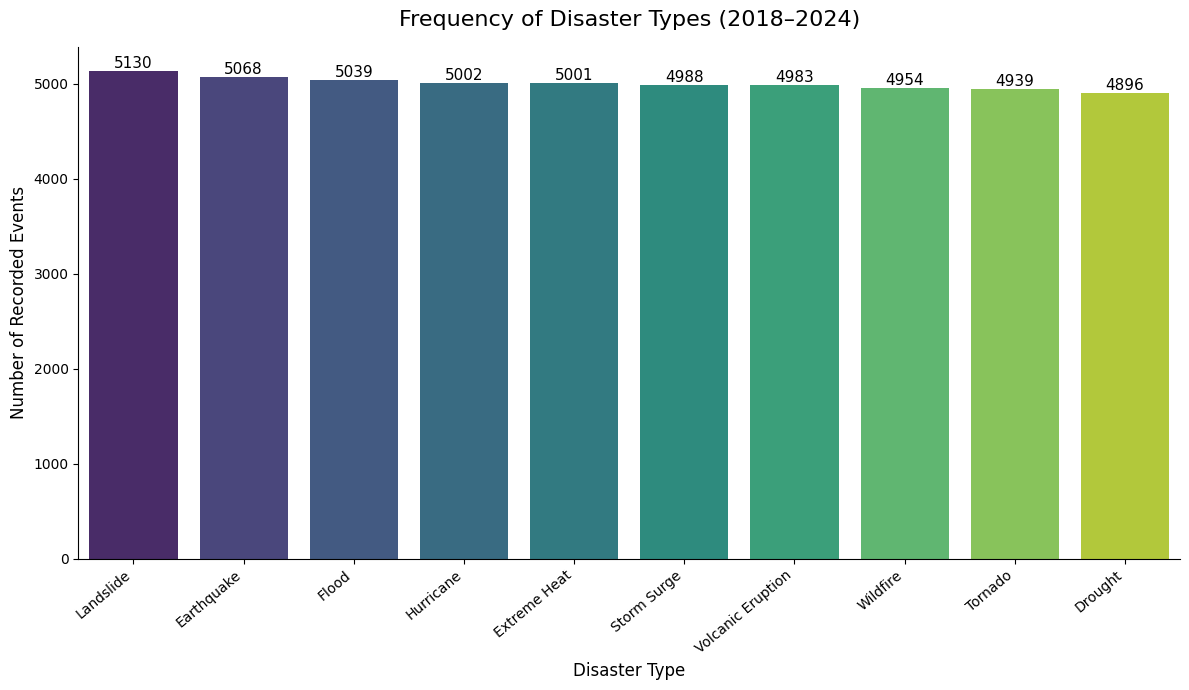

In [10]:
# ---------------------------------------
# Bar Chart: Disaster Type Frequency
# ---------------------------------------

plt.figure(figsize=(12, 7))

# Create color palette with as many colors as disaster types
palette = sns.color_palette("viridis", n_colors=df["disaster_type"].nunique())

ax = sns.countplot(
    data=df,
    x="disaster_type",
    order=df["disaster_type"].value_counts().index,
    palette=palette
)

# Titles & Labels
ax.set_title("Frequency of Disaster Types (2018–2024)", fontsize=16, pad=15)
ax.set_xlabel("Disaster Type", fontsize=12)
ax.set_ylabel("Number of Recorded Events", fontsize=12)

# Rotate x labels
plt.xticks(rotation=40, ha="right")

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fontsize=11)

# Clean look
sns.despine()
plt.tight_layout()
plt.show()


In [11]:
# ---------------------------------------
# Geographic Heatmap: Landslides by Country
# ---------------------------------------

landslides = df[df["disaster_type"] == "Landslide"]

landslide_counts = (
    landslides
    .groupby("country")
    .size()
    .reset_index(name="landslide_count")
)

fig = px.choropleth(
    landslide_counts,
    locations="country",
    locationmode="country names",
    color="landslide_count",
    title="Global Landslide Occurrences by Country (2018–2024)",
    color_continuous_scale="Viridis",
    labels={"landslide_count": "Number of Landslides"}
)

fig.show()

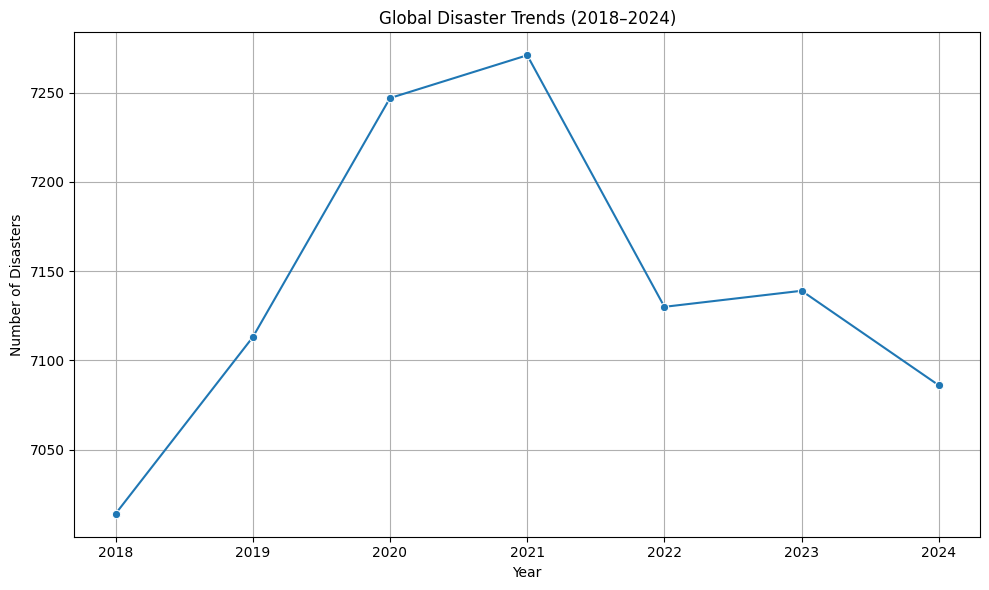

In [7]:
# ---------------------------------------
# 3) Time Series: Disaster Trends (2018–2024)
# ---------------------------------------

df["year"] = df["date"].dt.year

yearly_trends = (
    df.groupby("year")
    .size()
    .reset_index(name="disaster_count")
)

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=yearly_trends,
    x="year",
    y="disaster_count",
    marker="o"
)

plt.title("Global Disaster Trends (2018–2024)")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.grid(True)
plt.tight_layout()
plt.show()
